# ------ Import Modules ------

In [1]:
# import necessary modules
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from pandas_profiling import ProfileReport
from helperFile import GetProviderCount, MachineLearning, data_types
from IPython.display import HTML, IFrame

# suppress warnings
warnings.filterwarnings('ignore')

# ------ Exploratory Data Analysis ------

## Load Data

In [2]:
# set pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# load data
claim_data = pd.read_csv(os.path.join('../data','original','claim_sample.tar.gz'), 
                         compression='gzip', 
                         dtype=data_types,
                         low_memory=False)

# drop first column
claim_data.drop('claim.sample.csv', axis=1, inplace=True)

# drop last row
claim_data.dropna(inplace=True)

# show last rows to ensure drop last row and first column
claim_data.tail()

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID
472554,895587990.0,17,98799627,FA0001389001,,636,OP7O,,,72930,265.7261,,,,,,,0.0,0.0,48549,80032100,52255,M,H,,2,,
472555,895587990.0,18,98799627,FA0001389001,,636,OP7O,,,72930,174.5706,,,,,,,0.0,0.0,48549,80032100,52255,M,H,,2,,
472556,895587990.0,19,98799627,FA0001389001,,260,IH7O,,,72930,317.2665,,,,,,,0.0,0.0,48549,80032100,52255,M,H,,2,,
472557,895587990.0,1,98799627,FA0001389001,,324,RA7O,,71020,V7283,358.0050,,,,,,,0.0,0.0,48549,80032100,52255,M,H,,2,,
472558,231056990.0,1,99975920,FA0001389001,,324,RA7O,,71020,78607,358.0050,,,,,,,0.0,0.0,48546,80984950,0,M,H,,2,,


In [3]:
# show claim data information
claim_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472559 entries, 0 to 472558
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Claim.Number               472559 non-null  float64
 1   Claim.Line.Number          472559 non-null  object 
 2   Member.ID                  472559 non-null  object 
 3   Provider.ID                472559 non-null  object 
 4   Line.Of.Business.ID        472559 non-null  object 
 5   Revenue.Code               472559 non-null  object 
 6   Service.Code               472559 non-null  object 
 7   Place.Of.Service.Code      472559 non-null  object 
 8   Procedure.Code             472559 non-null  object 
 9   Diagnosis.Code             472559 non-null  object 
 10  Claim.Charge.Amount        472559 non-null  float64
 11  Denial.Reason.Code         472559 non-null  object 
 12  Price.Index                472559 non-null  object 
 13  In.Out.Of.Network          47

In [4]:
# get the unique claims
averages = claim_data.groupby('Claim.Number')['Claim.Line.Number'].max()
average_lines_per_claim = np.average(averages.values.astype('int'))
f"The average lines per claim is {average_lines_per_claim}"

'The average lines per claim is 5.012449987230783'

In [5]:
# describe numeric columns
claim_data.describe()

,Claim.Number,Claim.Charge.Amount,Subscriber.Payment.Amount,Provider.Payment.Amount
count,4.725590e+05,472559.000000,472559.000000,472559.000000
mean,6.876433e+08,1684.487052,0.060524,299.664982
std,4.631736e+08,6516.274159,14.559293,2651.754216
min,1.899000e+04,-192496.200000,0.000000,0.000000
25%,2.554021e+08,141.831700,0.000000,0.000000
50%,6.453732e+08,327.142500,0.000000,0.000000
75%,1.060539e+09,1072.781000,0.000000,0.000000
max,1.541242e+09,756336.700000,7625.259600,491735.200000


In [6]:
# look at the claim with the lowest amount
claim_data.loc[claim_data['Claim.Charge.Amount'] == min(claim_data['Claim.Charge.Amount'])]

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID
466009,1.389507e+09,5,94431843,FA0001774001,,278,AL7I,,,8052,-192496.2,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,99,,
466010,1.389507e+09,6,94431843,FA0001774001,,278,AL7I,,,8052,-192496.2,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,99,,
466049,1.389507e+09,3,94431843,FA0001774001,,278,AL7I,,,8052,-192496.2,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,


In [7]:
# look at all of the claim data
claim_data.iloc[466047:466054]

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID
466047,1.389507e+09,1,94431843,FA0001774001,,278,AL7I,,,8052,195162.700,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,
466048,1.389507e+09,2,94431843,FA0001774001,,300,AL7I,,,8052,1380.171,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,
466049,1.389507e+09,3,94431843,FA0001774001,,278,AL7I,,,8052,-192496.200,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,
466050,1.389507e+09,4,94431843,FA0001774001,,300,AL7I,,,8052,-138.264,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,
466051,1.389507e+09,5,94431843,FA0001774001,,309,AL7I,,,8052,-1241.907,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,
466052,1.389507e+09,6,94431843,FA0001774001,,111,RB7I,,,8052,12988.170,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,
466053,1.389507e+09,7,94431843,FA0001774001,,111,RB7I,,,8052,-12988.170,,,,,,,0.0,0.0,48547,76494000,52030,M,H,,2,,


In [8]:
# show the claim charge amounts 
claim_data['Claim.Charge.Amount'].value_counts(ascending=False)

 84.563250        6480
 0.000000         4598
 118.512000       4480
 123.450000       3386
 248.134500       3014
 148.140000       2925
 327.142500       2895
 127.153500       2750
 509.848500       2644
 116.043000       2341
 300.242745       2338
 195.051000       2290
 9.876000         2271
 37.035000        2254
 99.994500        2171
 428.371500       2118
 361.708500       2069
 199.989000       1971
 1135.740000      1947
 275.293500       1884
 232.086000       1879
 582.684000       1858
 237.024000       1800
 98.760000        1708
 73.230540        1644
 49.380000        1624
 272.824500       1573
 193.816500       1567
 246.900000       1527
 493.182750       1522
 0.012345         1492
 146.905500       1452
 633.298500       1450
 75.304500        1450
 36.615270        1380
 197.520000       1376
 358.005000       1368
 1759.471000      1325
 219.741000       1292
 378.991500       1278
 208.630500       1275
 793.783500       1274
 1759.471125      1269
 159.250500

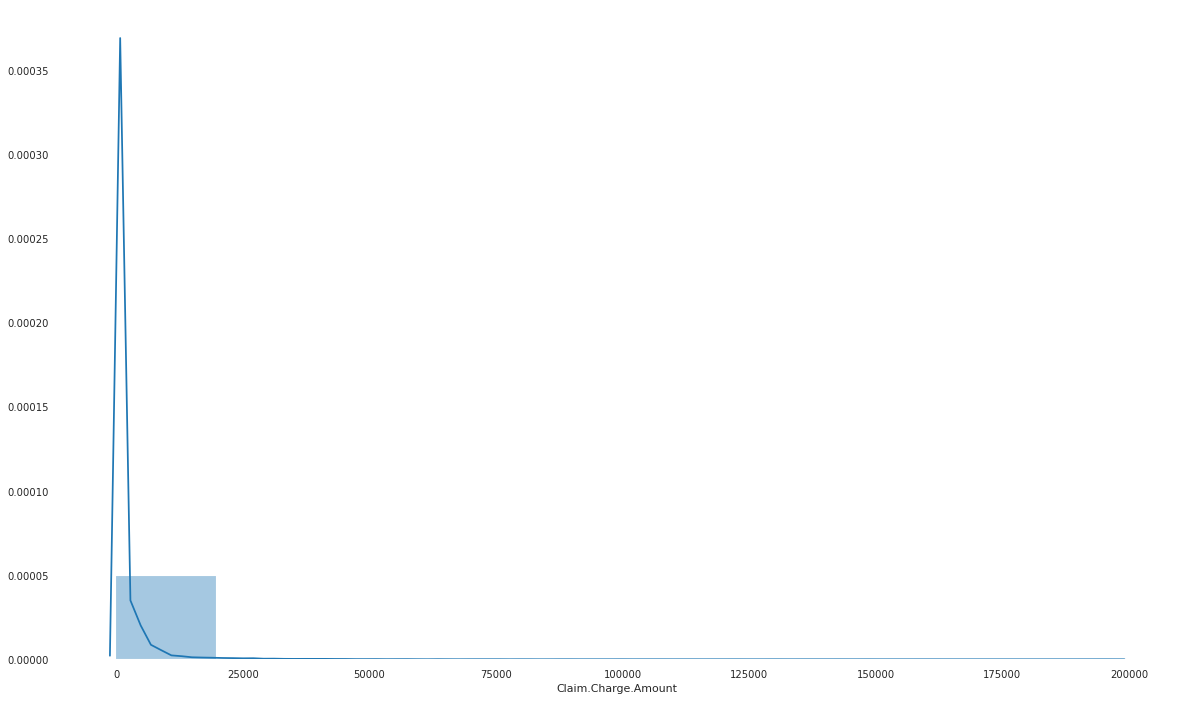

In [9]:
plt.figure(figsize=(20,12))
col = 'Claim.Charge.Amount'
claim_zero_200 = claim_data.loc[(claim_data[col] >= 0) &  (claim_data[col] <= 200000), col]
sns.distplot(claim_zero_200, bins=10);

In [10]:
# get procedure claims and add them to a list
IsProcedure = [ 1 if proc.startswith('J') else 0 for proc in claim_data['Procedure.Code']]

# add list as a new column to the dataframe
claim_data['IsProcedure'] = IsProcedure

# show a sample of the data
claim_data.loc[claim_data.IsProcedure == 1].head()

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,IsProcedure
3073,74645490.0,10,1992052,FA0001389001,5,636,OP7O,,J1650,4359,592.201995,KAO,A,I,N,N,,0.0,0.0,114,1613650,0,M,H,S,91,P00000000001,FH001309QB01,1
3091,18860690.0,8,22808129,FA0001389001,1,636,OP7O,,J2405,64303,118.832970,J2L,A,I,N,N,R,0.0,0.0,275,18475600,483,M,H,,2,H00000000001,FH001886QH01,1
3092,18860690.0,9,22808129,FA0001389001,1,636,OP7O,,J7030,64303,196.890405,J2L,A,I,N,N,R,0.0,0.0,275,18475600,483,M,H,,2,H00000000001,FH001886QH01,1
3103,281757390.0,10,1997607,FA0001389001,5,636,OP7O,,J1650,4359,592.201995,KDR,A,I,N,N,,0.0,0.0,114,1618150,0,M,H,S,91,P00000000001,FH001309QB01,1
3114,450273590.0,10,1991496,FA0001389001,5,636,OP7O,,J1650,4359,592.201995,KAO,A,I,N,N,,0.0,0.0,114,1613200,0,M,H,S,2,P00000000001,FH001309QB01,1


# ------ Question 1 (Procedure Analysis) ------

## Part A (Find the number of claim lines that have J-codes)

In [11]:
claims_with_procedures = claim_data.loc[claim_data.IsProcedure == 1, 'Claim.Number']
f"The number of unique claims with procedures is {len(np.unique(claims_with_procedures))}"

'The number of unique claims with procedures is 10691'

## Part B (How much was paid to providers for In Network Claims?)

In [12]:
from babel.numbers import format_currency
in_network_claims_with_procedures = claim_data.loc[(claim_data['IsProcedure'] == 1)
                                                    & (claim_data['In.Out.Of.Network'] == 'I'), 'Provider.Payment.Amount']
paid_amount = round(np.sum(in_network_claims_with_procedures),2)
f"The sum of payments made to providers for in-network procedures is {format_currency(paid_amount, 'USD', locale='en_US')}"


'The sum of payments made to providers for in-network procedures is $2,417,220.96'

## Part C (What are the top five J-codes based on the payment to providers?)


In [13]:
claim_data.loc[(claim_data['IsProcedure'] == 1)
               & (claim_data['Provider.Payment.Amount'] > 0), 'Procedure.Code'].value_counts(ascending=False).head()

J2405    540
J2501    457
J7030    387
J1170    363
J1644    301
Name: Procedure.Code, dtype: int64

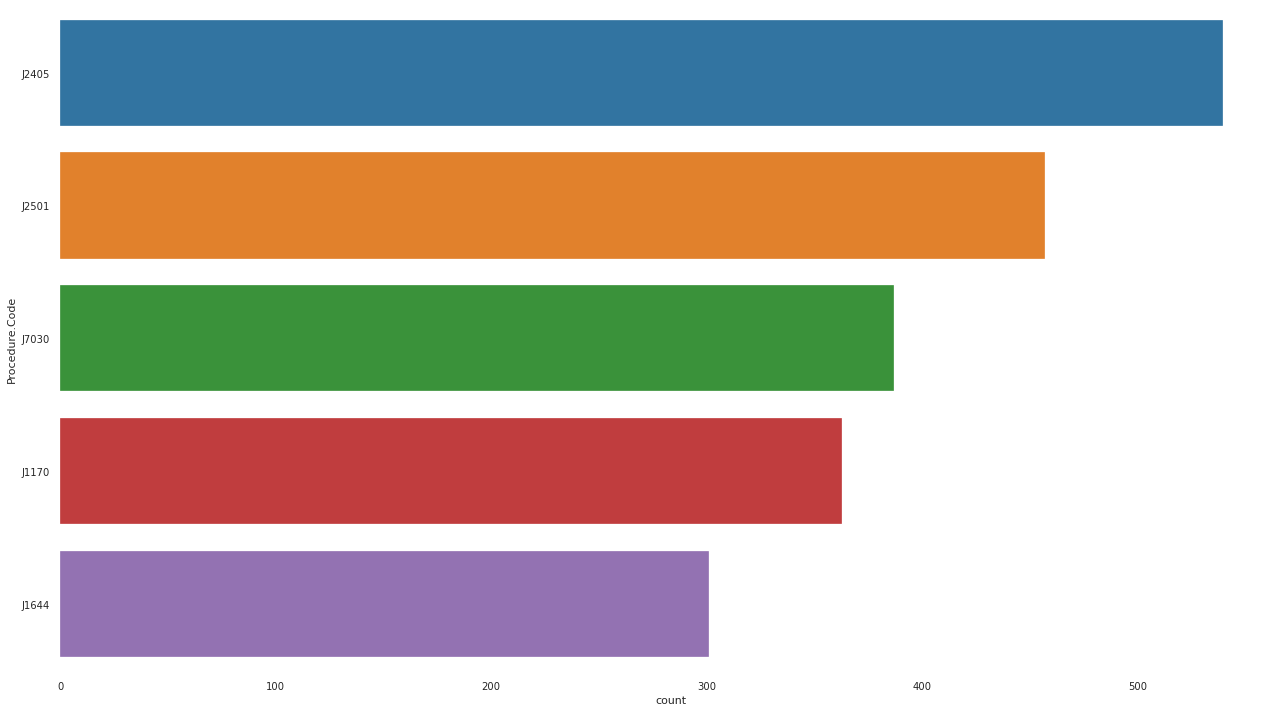

In [14]:
plt.figure(figsize=(18,10))
procedures = claim_data.loc[(claim_data['IsProcedure'] == 1)
               & (claim_data['Provider.Payment.Amount'] > 0), 'Procedure.Code']
sns.countplot(y=procedures, order=procedures.value_counts().iloc[:5].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"PaidProcedures_barchart.png"))

# ------ Question 2 (Provider Analysis) ------

## Scatter plot analysis of paid versus unpaid claims

In [15]:
# get providers with at least one paid claim
providers_with_paid_claims = claim_data.loc[(claim_data['IsProcedure'] == 1) 
               & (claim_data['Provider.Payment.Amount'] > 0), 'Provider.ID']
providers = list(set(providers_with_paid_claims))
provider_claims = [1 if prov in providers else 0 for prov in claim_data['Provider.ID']]



In [16]:
# get upaid claim data and put it into the claim dataframe
unpaid_claim_data = claim_data.loc[(claim_data['IsProcedure'] == 1) 
               & (claim_data['Provider.Payment.Amount'] == 0), 'Claim.Number'].index
unpaid_claims = np.zeros(len(claim_data))
unpaid_claims[unpaid_claim_data] = 1
claim_data['UnpaidClaim'] = unpaid_claims
claim_data['UnpaidClaim']  = claim_data['UnpaidClaim'].astype(int)

In [17]:
# get paid procedure claim data and put it into the claim dataframe
paid_claim_data = claim_data.loc[(claim_data['IsProcedure'] == 1) 
               & (claim_data['Provider.Payment.Amount'] > 0), 'Claim.Number'].index
paid_claims = np.zeros(len(claim_data))
paid_claims[paid_claim_data] = 1
claim_data['PaidClaim'] = paid_claims
claim_data['PaidClaim']  = claim_data['PaidClaim'].astype(int)

In [18]:
# produce unpaid and paid claim count by provider and load into a dataframe
provider_data = [GetProviderCount(claim_data, provider) for provider in providers]
provider_df = pd.DataFrame(provider_data, columns=['ProviderID','PaidCount','UnPaidCount'])

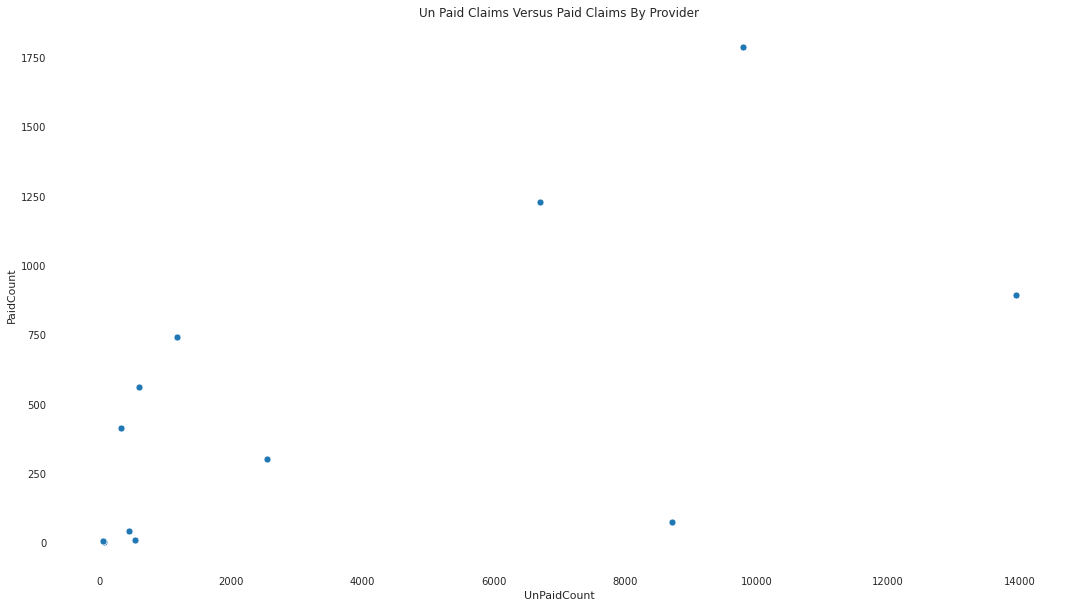

In [19]:
plt.figure(figsize=(18,10))
plt.title("Un Paid Claims Versus Paid Claims By Provider")
ax = sns.scatterplot(x='UnPaidCount', y="PaidCount", data=provider_df)
plt.savefig(os.path.join('../','visualization',f"PaidVsUnpaid_Scatterplot.png"))

## Graph Analysis and Concerns

As the numbers have stated, the provider paid percentage average is 17.69 while the average unpaid percentage is 82.31 which means that on overage healthcare organization are missing 82.31 of potential revenue. Providers have a paid percentage of anywhere between 1 to 56 percent. I would want to understand how this data relates to time as most claims are not paid until the end of the month. I would also want to understand why there is a wide discrepancy between provider paid percentages.  There is a strong positive correlation between the two variables (Paid Versus Unpaid Counts).


# ------ Question 3 (Data Analysis) ------ 

## Provider Paid Versus Unpaid Grid

In [20]:
# show paid versus upaid claim information with percentages
provider_df['Total Claims'] = provider_df['PaidCount'] + provider_df['UnPaidCount']
provider_df['Paid Percentage'] = (provider_df['PaidCount'] / provider_df['Total Claims']) * 100
provider_df['UnPaid Percentage'] = 100 - provider_df['Paid Percentage']
provider_df

,ProviderID,PaidCount,UnPaidCount,Total Claims,Paid Percentage,UnPaid Percentage
0,FA1000014002,5,49,54,9.259259,90.740741
1,FA0004551001,415,322,737,56.309362,43.690638
2,FA0001411001,1228,6703,7931,15.483546,84.516454
3,FA1000015001,740,1170,1910,38.743455,61.256545
4,FA0001387001,74,8710,8784,0.842441,99.157559
5,FA0001389003,8,539,547,1.462523,98.537477
6,FA0001774001,302,2545,2847,10.607657,89.392343
7,FA0001389001,895,13947,14842,6.030185,93.969815
8,FA0001411003,4,67,71,5.633803,94.366197
9,FA1000014001,561,601,1162,48.278830,51.721170


## Paid Versus Unpaid Percentage Numbers

In [21]:
# get the unpaid and paid percentages
average_paid_percentage = np.average(provider_df['Paid Percentage'])
average_unpaid_percentage = np.average(provider_df['UnPaid Percentage'])
f"The average paid percentage is {average_paid_percentage} while the unpaid percentage is {average_unpaid_percentage}"

'The average paid percentage is 17.693456299234207 while the unpaid percentage is 82.3065437007658'

## Provider Paid Percentages (Grouped Bar Chart)

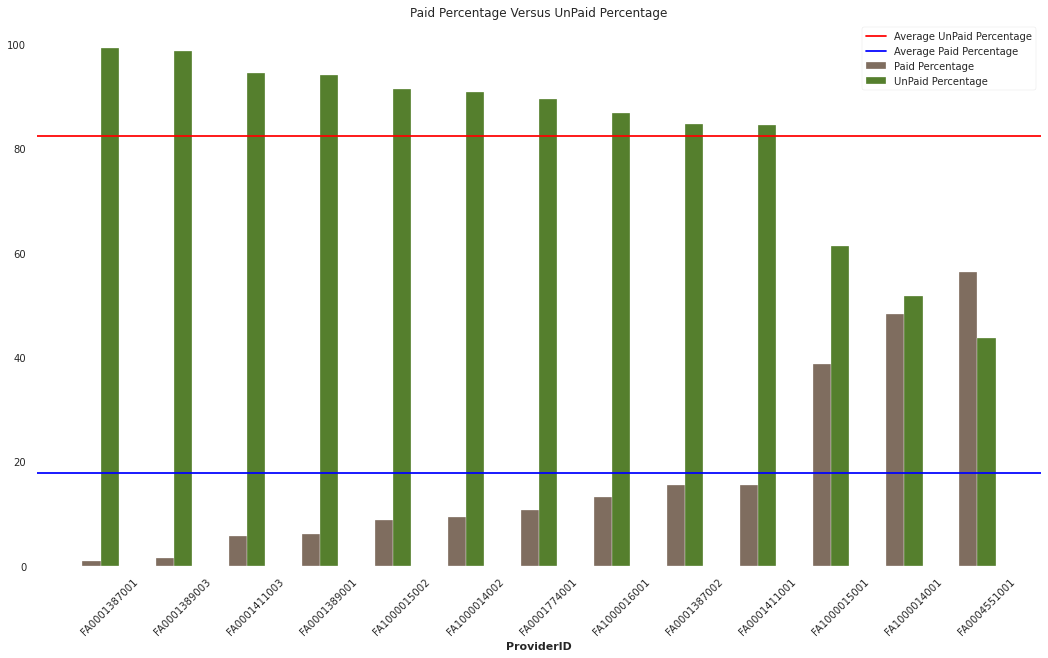

In [22]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25

# sort values before starting
provider_df = provider_df.sort_values('UnPaid Percentage', ascending=False)

# set height of bar
bars1 = provider_df['Paid Percentage'].values
bars2 = provider_df['UnPaid Percentage'].values

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# set figure size
plt.figure(figsize=(18,10))
plt.title("Paid Percentage Versus UnPaid Percentage")

# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Paid Percentage')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='UnPaid Percentage')
 
# Add xticks on the middle of the group bars
plt.xlabel('ProviderID', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], provider_df['ProviderID'].values, rotation=45)
 
# Add a static line for the average paid and unpaid amount
plt.axhline(average_unpaid_percentage, color='r', label='Average UnPaid Percentage')
plt.axhline(average_paid_percentage, color='b', label='Average Paid Percentage')

# Create legend & Show graphic
plt.legend()

# Save File
plt.savefig(os.path.join('../','visualization',f"PaidVsUnpaid_Percentage.png"))

# Show Image
plt.show()




## Data Prep

In [23]:
# load procedure data including new columns 
procedure_data = claim_data.loc[claim_data.IsProcedure == 1].copy()

# delete claim data from memory
del claim_data

# drop unneccessary columns (IsProcedure and Paid Claim)
procedure_data.drop(['IsProcedure', 'PaidClaim'], axis=1, inplace=True)

# convert claim number to an integer value
procedure_data['Claim.Number'] = procedure_data['Claim.Number'].astype(int)

# save data to file for future usage
procedure_data.to_csv(os.path.join('../data','original', 'procedure_data.tar.gz'), compression='gzip', index=False)

## Examine Procedure Data Set

In [24]:
# load data
procedure_data = pd.read_csv(os.path.join('../data','original', 'procedure_data.tar.gz'), low_memory=False)

# show first few rows
procedure_data.head()

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,UnpaidClaim
0,74645490,10,1992052,FA0001389001,5,636,OP7O,,J1650,4359,592.201995,KAO,A,I,N,N,,0.0,0.0,114,1613650,0,M,H,S,91,P00000000001,FH001309QB01,1
1,18860690,8,22808129,FA0001389001,1,636,OP7O,,J2405,64303,118.832970,J2L,A,I,N,N,R,0.0,0.0,275,18475600,483,M,H,,2,H00000000001,FH001886QH01,1
2,18860690,9,22808129,FA0001389001,1,636,OP7O,,J7030,64303,196.890405,J2L,A,I,N,N,R,0.0,0.0,275,18475600,483,M,H,,2,H00000000001,FH001886QH01,1
3,281757390,10,1997607,FA0001389001,5,636,OP7O,,J1650,4359,592.201995,KDR,A,I,N,N,,0.0,0.0,114,1618150,0,M,H,S,91,P00000000001,FH001309QB01,1
4,450273590,10,1991496,FA0001389001,5,636,OP7O,,J1650,4359,592.201995,KAO,A,I,N,N,,0.0,0.0,114,1613200,0,M,H,S,2,P00000000001,FH001309QB01,1


### Data Overview

51029 procedures
10691 unique procedure claims
6341 unique patients
Top Procedures for Member (88514637.0, 306)
mostly end stage renal cancer patients
top 5 injections are for prepping the patient for infusion (anethesia)
healthcare claim code reference (https://www.uhccommunityplan.com/assets/healthcareprofessionals/providerinformation/AZ-Provider-Information/AZ_Health_Care_Status_Codes.pdf)


In [25]:
procedure_data.shape

(51029, 29)

In [26]:
procedure_data['Member.ID'].nunique()

6341

In [27]:
procedure_data['Member.ID'].value_counts(ascending=False).head()

88514637    306
85733741    305
89405761    247
94627634    176
90164423    173
Name: Member.ID, dtype: int64

In [28]:
# J1644 == Injection, heparin sodium, per 1000 units
procedure_data.loc[procedure_data['Member.ID'] == 88514637.0]                  

,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,UnpaidClaim
26060,115277690,4,88514637,FA1000015001,13,636,OP7O,,J1644,5856,353.06700,PDC,A,I,N,N,,0.0,0.0,48546,71700800,0,E,H,,11,MIMAPD000001,PI003247QM03,1
26061,115277690,1,88514637,FA1000015001,13,636,OP7O,,J1644,5856,353.06700,PDC,A,I,N,N,,0.0,0.0,48546,71700800,0,E,H,,11,MIMAPD000001,PI003247QM03,1
26062,115277690,3,88514637,FA1000015001,13,636,OP7O,,J1644,5856,353.06700,PDC,A,I,N,N,,0.0,0.0,48546,71700800,0,E,H,,11,MIMAPD000001,PI003247QM03,1
26063,115277690,5,88514637,FA1000015001,13,636,OP7O,,J1644,5856,353.06700,PDC,A,I,N,N,,0.0,0.0,48546,71700800,0,E,H,,11,MIMAPD000001,PI003247QM03,1
26064,115277690,7,88514637,FA1000015001,13,636,OP7O,,J1644,5856,353.06700,PDC,A,I,N,N,,0.0,0.0,48546,71700800,0,E,H,,11,MIMAPD000001,PI003247QM03,1
26065,115277690,8,88514637,FA1000015001,13,636,OP7O,,J1644,5856,353.06700,PDC,A,I,N,N,,0.0,0.0,48546,71700800,0,E,H,,11,MIMAPD000001,PI003247QM03,1
26066,115277690,9,88514637,FA1000015001,13,636,OP7O,,J1644,5856,353.06700,PDC,A,I,N,N,,0.0,0.0,48546,71700800,0,E,H,,11,MIMAPD000001,PI003247QM03,1
26067,115277690,16,88514637,FA1000015001,13,636,OP7O,,J1644,5856,353.06700,PDC,A,I,N,N,,0.0,0.0,48546,71700800,0,E,H,,11,MIMAPD000001,PI003247QM03,1
26068,115277690,18,88514637,FA1000015001,13,636,OP7O,,J1644,5856,353.06700,PDC,A,I,N,N,,0.0,0.0,48546,71700800,0,E,H,,11,MIMAPD000001,PI003247QM03,1
26069,115277690,22,88514637,FA1000015001,13,636,OP7O,,J1644,5856,353.06700,PDC,A,I,N,N,,0.0,0.0,48546,71700800,0,E,H,,11,MIMAPD000001,PI003247QM03,1


### UnPaid Claim

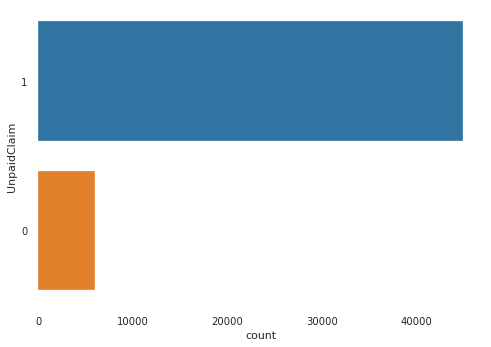

In [29]:
# look at values counts for the target
col = 'UnpaidClaim'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:5].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [30]:
procedure_data[col].value_counts()

1    44961
0     6068
Name: UnpaidClaim, dtype: int64

### Line.Of.Business.ID

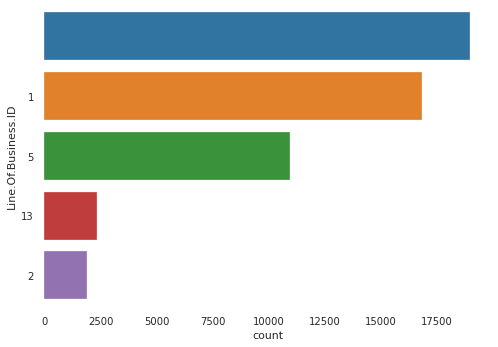

In [31]:
# look at line of business for procedure claims
col = 'Line.Of.Business.ID'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:5].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [32]:
procedure_data[col].value_counts()

      18962
1     16858
5     10946
13     2346
2      1906
7        11
Name: Line.Of.Business.ID, dtype: int64

### Revenue.Code

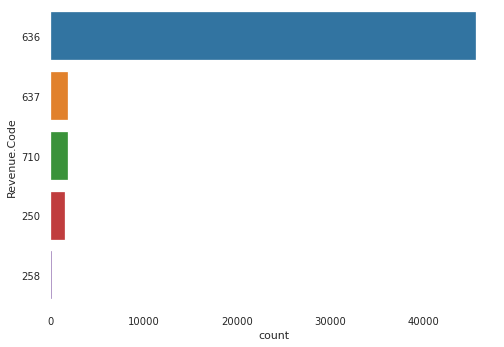

In [33]:
# look at line of business for procedure claims
# 636 drugs requiring detailed coding
# 637 self administrable drugs
# 710 general recovery room
# 250 pharmacy general
# 258 iv solutions
# https://med.noridianmedicare.com/web/jea/topics/claim-submission/revenue-codes
col = 'Revenue.Code'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:5].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [34]:
procedure_data[col].value_counts()

636    45594
637     1869
710     1808
250     1573
258       98
259       78
490        3
           2
450        2
635        1
272        1
Name: Revenue.Code, dtype: int64

### Service.Code

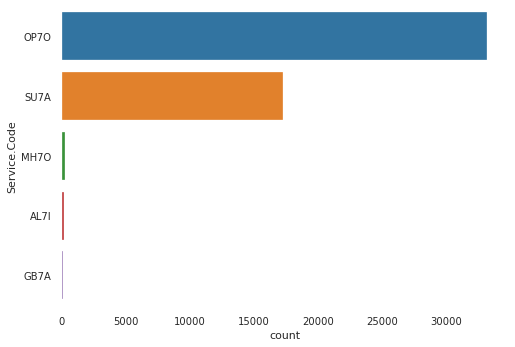

In [35]:
# look at line of business for procedure claims
# op70 collections and bad debt
# 
col = 'Service.Code'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:5].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [36]:
procedure_data[col].value_counts()

OP7O    33185
SU7A    17288
MH7O      250
AL7I      121
GB7A       69
           59
SA7A       39
CC8A       11
IJV         2
SU7O        2
ER7O        2
DI7O        1
Name: Service.Code, dtype: int64

### Place.Of.Service.Code

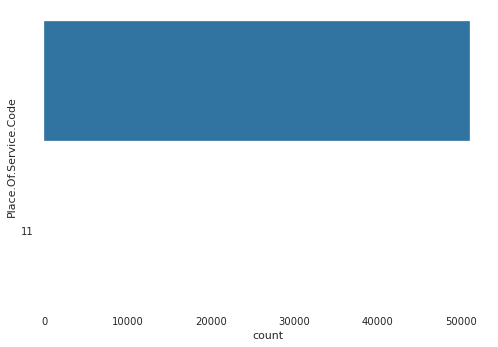

In [37]:
# look at line of business for procedure claims
col = 'Place.Of.Service.Code'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:5].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [38]:
procedure_data[col].value_counts()

      51027
11        2
Name: Place.Of.Service.Code, dtype: int64

### Diagnosis.Code

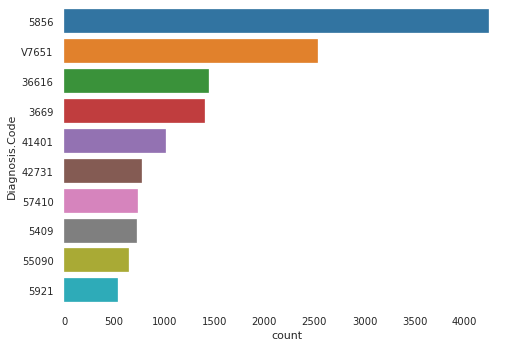

In [39]:
# 585.6 == End Stage Renal Disease
# v765.1 == Special screening for malignant neoplasms of colon
# 366.16 == Senile nuclear sclerosis (cataracts)
# 366.9 == cataract
# 414.01 == Coronary atherosclerosis of native coronary artery
# 427.31 == Atrial fibrillation
# 574.10 == Calculus of gallbladder with other cholecystitis, without mention of obstruction
# 540.9 == Other acute appendicitis
# 55090 == Inguinal hernia, without mention of obstruction or gangrene, unilateral or unspecified (not specified as recurrent)
# 592.1 == Calculus of ureter

# look at Diagnosis.Code for procedure claims
col = 'Diagnosis.Code'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [40]:
procedure_data[col].value_counts()

5856     4245
V7651    2540
36616    1451
3669     1403
41401    1013
42731     778
57410     741
5409      733
55090     648
5921      539
72210     509
78909     493
78900     431
7242      393
57400     393
33819     373
7840      367
78659     362
2859      354
5920      323
3540      309
34690     300
53081     290
V5811     285
6262      285
2189      278
78906     268
2113      258
5990      257
1749      256
78650     245
78903     240
81342     230
53510     217
42732     210
632       210
7172      205
73382     204
5589      204
193       196
78901     193
78720     192
V5331     187
8360      176
2809      176
V510      175
52489     164
78904     161
72703     157
44021     156
61801     156
99673     146
78701     146
5303      145
6271      145
486       144
7804      142
7350      141
1744      141
78791     140
5693      139
33829     133
6110      133
7140      131
5368      130
5362      130
53085     129
56211     126
8442      126
6826      125
5533      122
7213  

### Claim.Charge.Amount

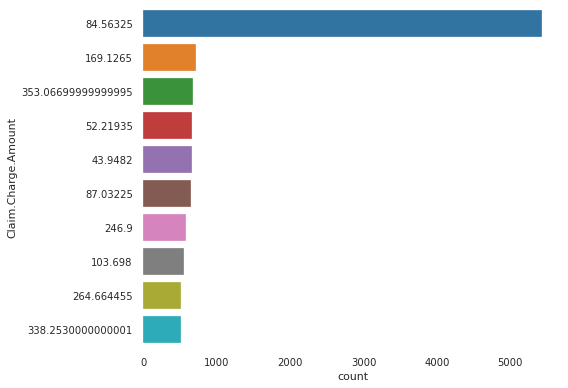

In [41]:
# look at charge amounts
col = 'Claim.Charge.Amount'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [42]:
procedure_data[col].value_counts()

 84.563250       5426
 169.126500       722
 353.067000       671
 52.219350        664
 43.948200        662
 87.032250        652
 246.900000       577
 103.698000       548
 264.664455       517
 338.253000       508
 86.415000        491
 87.649500        485
 269.071620       485
 78.477160        466
 104.932500       447
 119.129200       431
 264.664500       403
 53.021770        402
 147.843700       390
 78.477165        375
 269.071600       365
 213.519120       358
 170.262240       346
 118.512000       343
 219.123800       338
 196.248465       328
 53.108190        324
 109.870500       315
 99.994500        307
 85.797750        297
 90.118500        291
 337.857960       284
 219.123750       280
 147.843720       275
 108.833500       275
 207.396000       275
 95.056500        262
 90.711060        259
 72.205910        248
 118.832970       242
 120.808170       242
 175.299000       237
 85.180500        236
 53.848890        235
 119.129250       232
 132.21490

### Denial.Reason.Code

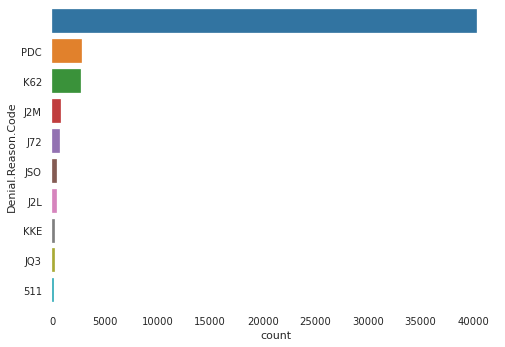

In [43]:
# k62 THIS SERVICE IS NOT PAID. THE PROCEDURE EXCEEDED MAX UNITS ALLOWED PER DATE 
# OF SERVICE ON THIS CLAIM OR ANOTHER CLAIM FOR SAME DOS.
# PDC — Billed amount is higher than the maximum payment insurance allows. The payment is for the allowed amount.
col = 'Denial.Reason.Code'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [44]:
# k62 THIS SERVICE IS NOT PAID. THE PROCEDURE EXCEEDED MAX UNITS ALLOWED PER DATE 
# OF SERVICE ON THIS CLAIM OR ANOTHER CLAIM FOR SAME DOS.
# PDC — Billed amount is higher than the maximum payment insurance allows. The payment is for the allowed amount.
procedure_data[col].value_counts()

       40417
PDC     2824
K62     2691
J2M      803
J72      705
JSO      486
J2L      402
KKE      249
JQ3      232
511      184
TF1      168
ST       166
K45      150
J32      113
JH       106
J3E       82
K99       78
F13       72
JFI       64
J6T       57
KDR       54
JI7       51
JSI       47
JIC       45
S16       43
K54       40
KAO       39
K96       39
S5        38
CDD       34
JRM       32
19        31
KDP       28
S9        26
KAL       26
J83       21
PSR       19
JRN       19
KKB       15
ADR       15
S23       14
104       14
JAQ       14
JO6       13
K95       13
3         13
JZB       13
JIW       12
KDS       12
JSJ       12
KDK       10
CD0       10
73        10
JUB        9
JO5        9
K87        8
S13        8
JM         8
S1C        6
KJX        6
KEX        6
JB7        6
JFQ        5
JFR        5
KDF        5
346        5
JD3        5
JA         5
KBC        4
K50        4
JC9        4
KDL        4
KBH        3
KAV        3
J3         3
K97        3
L04        3

### Price.Index

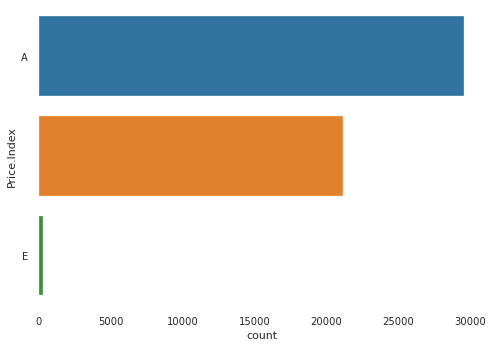

In [45]:
# look at priced index
col = 'Price.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [46]:
procedure_data[col].value_counts().iloc[:10]

A    29547
     21170
E      312
Name: Price.Index, dtype: int64

### In.Out.Of.Network

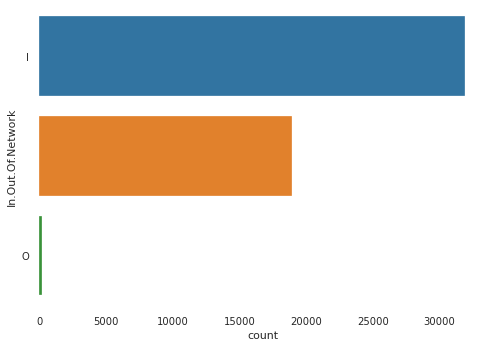

In [47]:
# look at in versus out of network
col = 'In.Out.Of.Network'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [48]:
procedure_data[col].value_counts().iloc[:10]

I    31890
     18980
O      159
Name: In.Out.Of.Network, dtype: int64

### Reference.Index

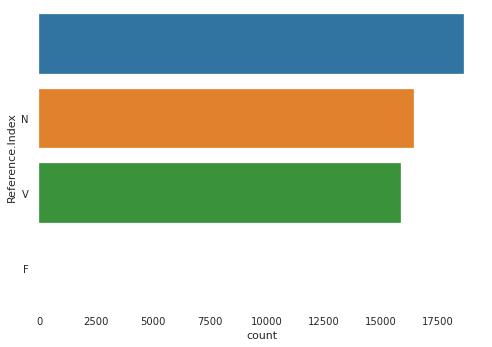

In [49]:
col = 'Reference.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [50]:
# look at reference index
col = 'Reference.Index'
procedure_data[col].value_counts(ascending=False).head(10)

     18666
N    16473
V    15879
F       11
Name: Reference.Index, dtype: int64

### Pricing.Index

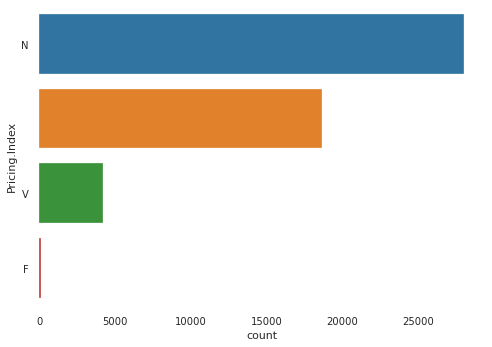

In [51]:
col = 'Pricing.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [52]:
# look at pricing index
procedure_data[col].value_counts(ascending=False).head(10)

N    28056
     18666
V     4194
F      113
Name: Pricing.Index, dtype: int64

### Capitation.Index

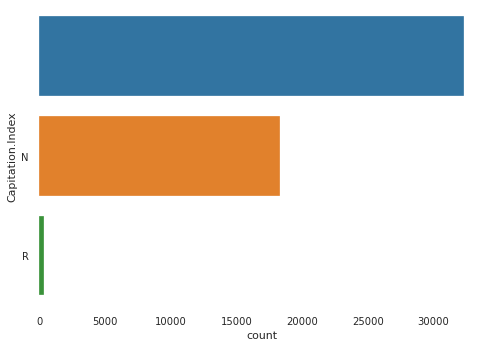

In [53]:
col = 'Capitation.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [54]:
# look at capitation index
procedure_data[col].value_counts(ascending=False).head(10)

     32331
N    18296
R      402
Name: Capitation.Index, dtype: int64

### Subscriber.Payment.Amount

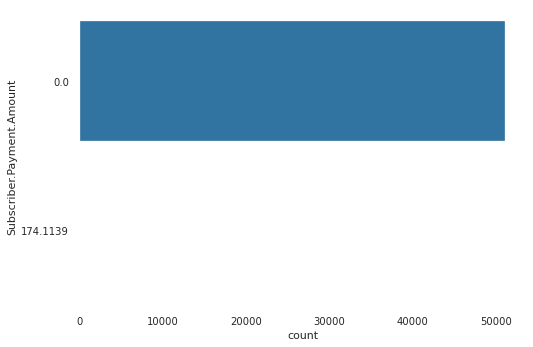

In [55]:
col = 'Subscriber.Payment.Amount'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [56]:
# look at subscriber payment amount
procedure_data[col].value_counts(ascending=False).head(10)

0.0000      51028
174.1139        1
Name: Subscriber.Payment.Amount, dtype: int64

### Provider.Payment.Amount

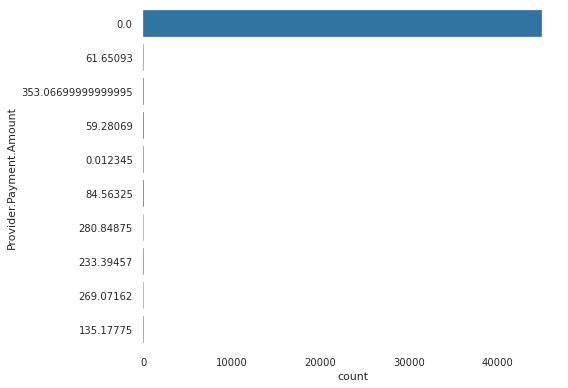

In [57]:
col ='Provider.Payment.Amount'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [58]:
# look at provider payment amount
procedure_data[col].value_counts(ascending=False).head(10)

0.000000      44961
61.650930       113
353.067000      100
59.280690        96
0.012345         86
84.563250        79
280.848750       72
233.394570       60
269.071620       59
135.177750       57
Name: Provider.Payment.Amount, dtype: int64

### Group.Index

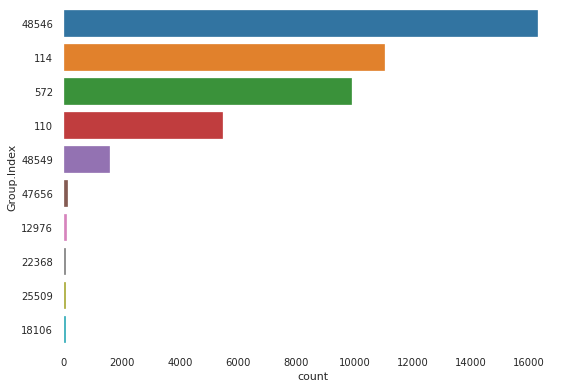

In [59]:
col ='Group.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [60]:
# look at group index
procedure_data[col].value_counts(ascending=False).head(10)

48546    16297
114      11033
572       9905
110       5474
48549     1599
47656      160
12976      118
22368       98
25509       87
18106       86
Name: Group.Index, dtype: int64

### Subscriber.Index

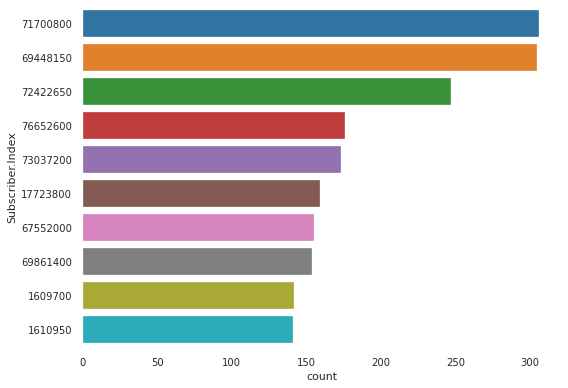

In [61]:
col ='Subscriber.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [62]:
# look at subscriber index
procedure_data[col].value_counts(ascending=False).head(10)

71700800    306
69448150    305
72422650    247
76652600    176
73037200    173
17723800    159
67552000    155
69861400    154
1609700     142
1610950     141
Name: Subscriber.Index, dtype: int64

### Subgroup.Index

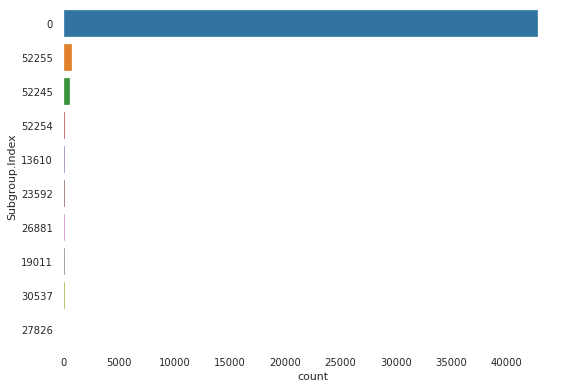

In [63]:
col = 'Subgroup.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [64]:
# look at sub-group index
procedure_data[col].value_counts(ascending=False).head(10)

0        42797
52255      800
52245      619
52254      153
13610      118
23592       98
26881       87
19011       86
30537       85
27826       78
Name: Subgroup.Index, dtype: int64

### Claim.Type

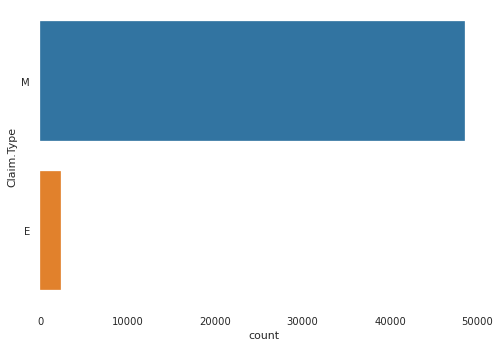

In [65]:
col = 'Claim.Type'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [66]:
# look at claim type
procedure_data[col].value_counts(ascending=False).head(10)

M    48612
E     2417
Name: Claim.Type, dtype: int64

### Claim.Subscriber.Type

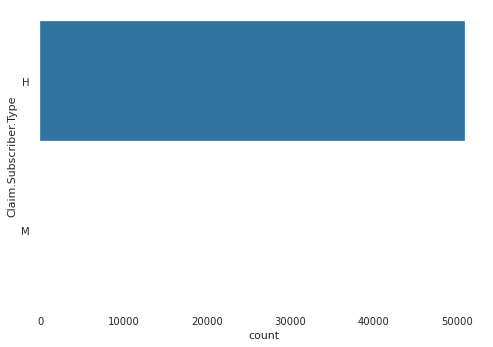

In [67]:
col = 'Claim.Subscriber.Type'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [68]:
# look at subsriber type
procedure_data[col].value_counts(ascending=False).head(10)

H    51027
M        2
Name: Claim.Subscriber.Type, dtype: int64

### Claim.Pre.Prince.Index

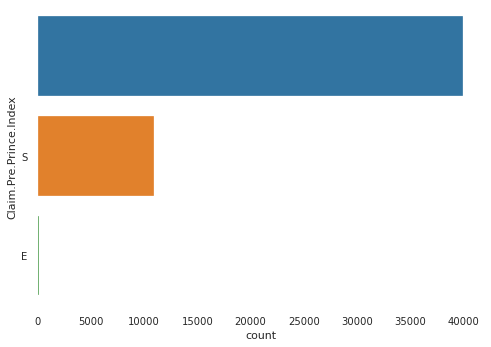

In [69]:
col = 'Claim.Pre.Prince.Index'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [70]:
# look at claim pre price index
procedure_data[col].value_counts(ascending=False).head(10)

     39996
S    10959
E       74
Name: Claim.Pre.Prince.Index, dtype: int64

### Claim.Current.Status

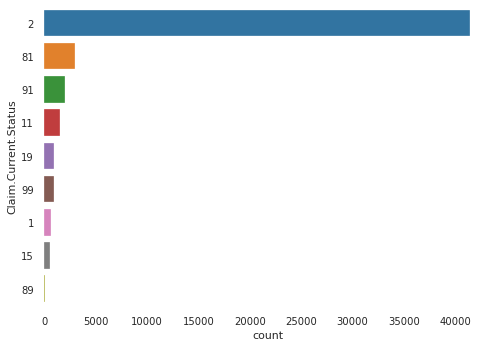

In [71]:
col = 'Claim.Current.Status'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [72]:
# look at claim current status
procedure_data[col].value_counts(ascending=False).head(10)

2     41391
81     3001
91     2032
11     1498
19      955
99      915
1       657
15      520
89       60
Name: Claim.Current.Status, dtype: int64

### Network.ID

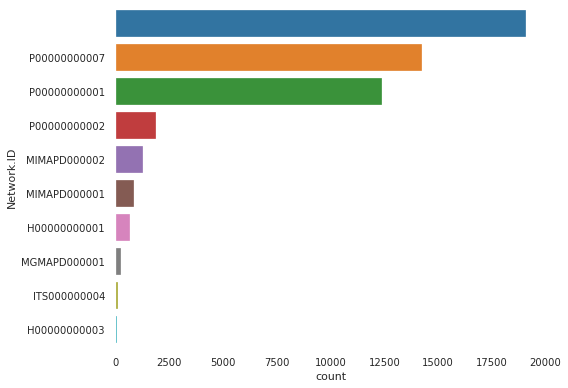

In [73]:
col = 'Network.ID'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [74]:
# network id
procedure_data[col].value_counts(ascending=False).head(20)

                19063
P00000000007    14270
P00000000001    12405
P00000000002     1883
MIMAPD000002     1273
MIMAPD000001      879
H00000000001      669
MGMAPD000001      257
ITS000000004      101
H00000000003       88
H00000000002       72
P00000000003       37
H00000000004       16
H00000000011        9
P00000000009        7
Name: Network.ID, dtype: int64

### Agreement.ID

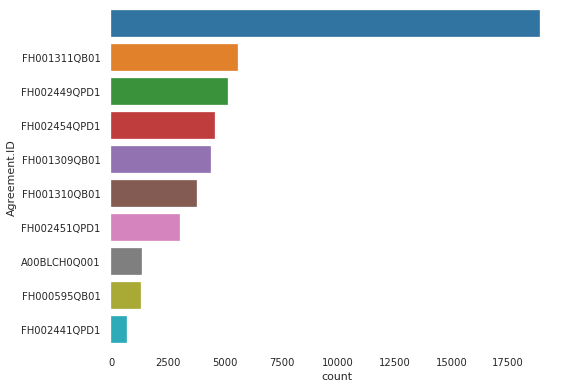

In [75]:
col = 'Agreement.ID'
sns.countplot(y=procedure_data[col], order=procedure_data[col].value_counts().iloc[:10].index);
plt.tight_layout()
plt.savefig(os.path.join('../','visualization',f"{col}_barchart.png"))

In [76]:
# agreement id
procedure_data[col].value_counts(ascending=False).head(10)

                18905
FH001311QB01     5586
FH002449QPD1     5155
FH002454QPD1     4571
FH001309QB01     4409
FH001310QB01     3777
FH002451QPD1     3048
A00BLCH0Q001     1374
FH000595QB01     1302
FH002441QPD1      681
Name: Agreement.ID, dtype: int64

## Data Profile

In [77]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import os

produce_report = False

if produce_report:
    # produce profile report
    profile = ProfileReport(procedure_data, title="Procedure Data Report", minimal=True);

    # show profile in notebook
    profile.to_widgets();
    
    # save profile to visalizations folder
    profile.to_file(os.path.join('../visualization','Procedure_Data_Report.html'))


In [78]:
# show saved report
IFrame(src=os.path.join('../visualization','Procedure_Data_Report.html'), width=950, height=400)

## Drop Columns after EDA

In [79]:
# drop columns ['Claim.Subscriber.Type', Subscriber.Payment.Amount', 'Place.Of.Service.Code']
procedure_data.drop(['Claim.Number', 'Claim.Line.Number', 'Member.ID',
                     'Claim.Subscriber.Type', 'Subscriber.Payment.Amount', 'Place.Of.Service.Code'], inplace=True, axis=1)

# replace blank values with NaN
procedure_data = procedure_data.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

# add cleaned file to cleaned folder
procedure_data.to_csv(os.path.join('../data','cleaned','procedure_data.tar.gz'), compression='gzip', index=False)

In [80]:
# make sure columsn are removed
procedure_data.head()

,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Procedure.Code,Diagnosis.Code,Claim.Charge.Amount,Denial.Reason.Code,Price.Index,In.Out.Of.Network,Reference.Index,Pricing.Index,Capitation.Index,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID,UnpaidClaim
0,FA0001389001,5,636,OP7O,J1650,4359,592.201995,KAO,A,I,N,N,NaN,0.0,114,1613650,0,M,S,91,P00000000001,FH001309QB01,1
1,FA0001389001,1,636,OP7O,J2405,64303,118.832970,J2L,A,I,N,N,R,0.0,275,18475600,483,M,NaN,2,H00000000001,FH001886QH01,1
2,FA0001389001,1,636,OP7O,J7030,64303,196.890405,J2L,A,I,N,N,R,0.0,275,18475600,483,M,NaN,2,H00000000001,FH001886QH01,1
3,FA0001389001,5,636,OP7O,J1650,4359,592.201995,KDR,A,I,N,N,NaN,0.0,114,1618150,0,M,S,91,P00000000001,FH001309QB01,1
4,FA0001389001,5,636,OP7O,J1650,4359,592.201995,KAO,A,I,N,N,NaN,0.0,114,1613200,0,M,S,2,P00000000001,FH001309QB01,1


# ------ Create Models ------

## Base Line Model (Logistic Regression)

In [81]:
from helperFile import MachineLearning
import os

# store name to be use in results
model = 'LogisticRegression'

machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}"))

# set up pre-processing
preprocessing = machine_learning.PreProcessing()

# perform logistic regression
# print out mean squared error and accuracy
mse, score = machine_learning.LogisticRegression()

print(f"The mean squared error is {mse} and accuracy is {score}")

The mean squared error is 0.01152019002375297 and accuracy is 0.9884798099762471


## Random Forest Classifier Tuning

In [82]:
from helperFile import MachineLearning, random_tune
import os

# store name to be use in results
model = 'RandomForest'

machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}"))

# set up pre-processing
preprocessing = machine_learning.PreProcessing()

# store results as a list of tuples
results = []

# loop through each paramter and parameter value
for key, values in random_tune.items():
    # loop through each 
    for value in values:
        
        # set parameter and value to tune
        parameter = { key : value }
        
        # perform random forst
        score = machine_learning.RandomForest(parameter_dict=parameter, regressor=False)
        
        results.append((key, value, score))

### Show best results

In [83]:
# store best result to be used as parameter
best_results_dict = {}

# loop through all parameter keys
for key in random_tune.keys():
    
    # get the values for current key
    values = [val for val in results if val[0] == key]
    # get the score for current key
    scores = [val[2] for val in values]
    # get parameter for current key and max score
    best_score = [val for val in values if val[2] == min(scores)]
    # set diction with best parameter and parameter value
    best_results_dict[best_score[0][0]] = best_score[0][1]
    
# print out results
print(best_results_dict)

{'max_depth': 100, 'n_estimators': 70, 'max_features': None, 'min_samples_leaf': 1}


### Final, Tuned, Random Forest

In [84]:
import os
from helperFile import MachineLearning

# store name to be use in results
model = 'RandomForest'

# call machine learning class
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}"))
# setup pre processing
preprocessing = machine_learning.PreProcessing()

# set best_results_dict
best_results_dict = {'max_depth': 100, 'n_estimators': 70, 'max_features': None, 'min_samples_leaf': 1}

# perform random forest using best parameters
mse, score = machine_learning.RandomForest(regressor=False, parameter_dict=best_results_dict)

# print final model score
print(f"The mean squared error is {mse} and accuracy is {score}")

The mean squared error is 0.007660332541567696 and accuracy is 0.9923396674584323


## XgBoost Tuning

In [85]:
# import tuneing parameters
import os
from helperFile import MachineLearning, xgb_tune

# set model name
model = 'XGBoost'

# call machine learning class
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}"))

# perform pre-processing
preprocessing = machine_learning.PreProcessing()

# store results as a list of tuples
results = []

# loop through each paramter and parameter value
for key, values in xgb_tune.items():
    # loop through each
    for value in values:

        # set parameter and value to tune
        parameter = {key: value}

        # perform random forst
        score = machine_learning.XGboost(regressor=False, parameter_dict=parameter)

        results.append((key, value, score))

[11:21:41] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:21:45] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:21:50] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:23:05] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:23:08] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




### Show best results

In [86]:
# store best result to be used as parameter
best_results_dict = {}

# loop through all parameter keys
for key in xgb_tune.keys():

    # get the values for current key
    values = [val for val in results if val[0] == key]
    # get the score for current key
    scores = [val[2] for val in values]
    # get parameter for current key and max score
    best_score = [val for val in values if val[2] == min(scores)]
    # set diction with best parameter and parameter value
    best_results_dict[best_score[0][0]] = best_score[0][1]

# print out results
print(best_results_dict)

{'learning_rate': 0.6, 'max_depth': 20, 'n_estimators': 100}


### Final, Tuned, XgBoost

In [87]:
import os
from helperFile import MachineLearning
import xgboost as xgb

# set model name
model = 'XGBoost' 

# call machine learning class
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}"))
 
# setup pre processing
preprocessing = machine_learning.PreProcessing()

# # set best_results_dict
best_results_dict = {'learning_rate': 0.6, 'max_depth': 20, 'n_estimators': 100}

# # perform random forest using best parameters
mse, score = machine_learning.XGboost(regressor=False, parameter_dict=best_results_dict)
        
# # print final model score
print(mse, score)

[11:23:13] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.006413301662707839 0.9935866983372922


## LgBoost Tuning

In [88]:
# import tuneing parameters
import os
from helperFile import MachineLearning, lgb_tune

# set model name
model = 'LGBoost'

# call machine learning class
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}"))
 
# set columns for preprocessing
preprocessing = machine_learning.PreProcessing()

# store results as a list of tuples
results = []

# loop through each paramter and parameter value
for key, values in lgb_tune.items():
    # loop through each 
    for value in values:
        
        # set parameter and value to tune
        parameter = { key : value }
        
        # perform random forst
        score = machine_learning.LGboost(regressor=False, parameter_dict=parameter)
        
        results.append((key, value, score))

### Show best results

In [89]:
# store best result to be used as parameter
best_results_dict = {}

# loop through all parameter keys
for key in lgb_tune.keys():

    # get the values for current key
    values = [val for val in results if val[0] == key]
    # get the score for current key
    scores = [val[2] for val in values]
    # get parameter for current key and max score
    best_score = [val for val in values if val[2] == min(scores)]
    # set diction with best parameter and parameter value
    best_results_dict[best_score[0][0]] = best_score[0][1]

# print out results
print(best_results_dict)

{'learning_rate': 0.4, 'max_depth': 13, 'num_leaves': 126, 'n_estimators': 100, 'min_data_in_leaf': 100}


### Final, Tuned, LgBoost

In [90]:
import os
from helperFile import MachineLearning
import xgboost as xgb

# set model name
model = 'LGBoost' 

# call machine learning class
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}"))
 
# setup pre processing
preprocessing = machine_learning.PreProcessing()

# # set best_results_dict
best_results_dict = {'learning_rate': 0.4, 'max_depth': 13, 'num_leaves': 126, 'n_estimators': 100, 'min_data_in_leaf': 100}

# # perform random forest using best parameters
score, mse = machine_learning.LGboost(regressor=False, parameter_dict=best_results_dict)
        
# # print final model score
print(score, mse)

0.007897862232779097 0.9921021377672209


# ------ Test Models ------

## Logistic Regression Cross Validation

In [91]:
# do 5-fold cross validation on models and measure MSE
import os
import numpy as np
from helperFile import MachineLearning

# store name to be use in results
model = 'LogisticRegression'

# store results for all models
cv_results = {}

# load data
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}_CrossValidation"))

# setup pre processing
preprocessing=machine_learning.PreProcessing()

# perform random forest using best parameters
mse = machine_learning.LogisticRegression(cross_validation=True)

# get minimum mse value index
index = np.argmin(mse[0])

# get minimum mse and corresponding accuracy
min_mse = mse[0][index]
min_accuracy = mse[1][index]

# store final model score
cv_results[model] = min_mse, min_accuracy

## Random Forest Cross Validation

In [92]:
import os
import numpy as np
from helperFile import MachineLearning, randomforest_best_results_dict

# store name to be use in results
model = 'RandomForest'

# load data
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}_CrossValidation"))

# setup pre processing
preprocessing = machine_learning.PreProcessing()

# perform random forest using best parameters
mse = machine_learning.RandomForest(
    parameter_dict=randomforest_best_results_dict, regressor=False, cross_validation=True)

# get minimum mse value index
index = np.argmin(mse[0])

# get minimum mse and corresponding accuracy
min_mse = mse[0][index]
min_accuracy = mse[1][index]

# store final model score
cv_results[model] = min_mse, min_accuracy

## XgBoost Forest Cross Validation

In [93]:
import os
import numpy as np
from helperFile import MachineLearning, xgb_best_results_dict

# store name to be use in results
model = 'XGboost'

# load data
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}_CrossValidation"))

# setup pre processing
preprocessing = machine_learning.PreProcessing()

# perform random forest using best parameters
mse = machine_learning.XGboost(
    parameter_dict=xgb_best_results_dict, regressor=False, cross_validation=True)

# get minimum mse value index
index = np.argmin(mse[0])

# get minimum mse and corresponding accuracy
min_mse = mse[0][index]
min_accuracy = mse[1][index]

# store final model score
cv_results[model] = min_mse, min_accuracy

[11:25:08] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:25:16] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:25:25] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


## LgBoost Forest Cross Validation

In [94]:
import os
import numpy as np
from helperFile import MachineLearning, lgb_best_results_dict

# store name to be use in results
model = 'LGboost'

# load data
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}_CrossValidation"))

# setup pre processing
preprocessing = machine_learning.PreProcessing()

# perform random forest using best parameters
mse = machine_learning.LGboost(
    parameter_dict=lgb_best_results_dict, regressor=False, cross_validation=True)

# get minimum mse value index
index = np.argmin(mse[0])

# get minimum mse and corresponding accuracy
min_mse = mse[0][index]
min_accuracy = mse[1][index]

# store final model score
cv_results[model] = min_mse, min_accuracy

## Show model results

In [95]:
import pandas as pd
model_dataframe = pd.DataFrame()
model_dataframe['Model'] = cv_results.keys()
model_dataframe['MeanSquaredError'] = [v[0] for v in cv_results.values()]
model_dataframe['Accuracy'] = [v[1] for v in cv_results.values()]
model_dataframe

,Model,MeanSquaredError,Accuracy
0,LogisticRegression,0.024887,0.975113
1,RandomForest,0.022536,0.977464
2,XGboost,0.024299,0.975701
3,LGboost,0.031942,0.968058


## Save results to file

In [96]:
# write dataframe to file
model_dataframe.to_csv(os.path.join('../logs','FinalResults.csv'), index=False)

## Select best model

In [97]:
#select the model with the lowest error as your "production" model
import pandas as pd
import os 

model_dataframe = pd.read_csv(os.path.join('../logs', 'FinalResults.csv'), low_memory=False)
best_model = model_dataframe.loc[model_dataframe['MeanSquaredError'] == min(model_dataframe['MeanSquaredError'])]
best_model

,Model,MeanSquaredError,Accuracy
1,RandomForest,0.022536,0.977464


## Save Final Model

In [98]:
import os
import numpy as np
from helperFile import MachineLearning, randomforest_best_results_dict, xgb_best_results_dict, lgb_best_results_dict

# store name to be use in results
model = best_model['Model'].to_string(index=False).strip()

# load data
machine_learning = MachineLearning(train_data=os.path.join('../data','cleaned','procedure_data.tar.gz'), 
                                   label='UnpaidClaim',
                                   log_file=os.path.join('../logs', f"{model}_FinalModel"))

# setup pre processing
preprocessing = machine_learning.PreProcessing()

if model == 'LogisticRegression':
    machine_learning.LogisticRegression(save_model=True)
elif model == 'RandomForest':
    machine_learning.RandomForest(
        parameter_dict=randomforest_best_results_dict, regressor=False, save_model=True)
elif model == 'XGboost':
    machine_learning.XGboost(parameter_dict=xgb_best_results_dict, regressor=False, save_model=True)
elif model == 'LGboost':
    machine_learning.LGboost(parameter_dict=lgb_best_results_dict, regressor=False, save_model=True)
else:
    print(f'{model} not found')

## Feature Importance for Best Model

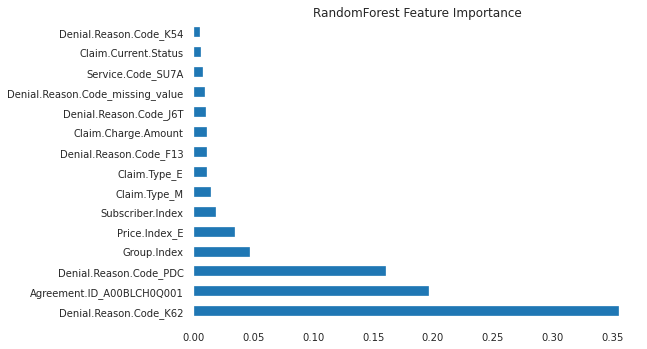

In [99]:
from helperFile import FeatureImportance

# store name to be use in results
model_name = best_model['Model'].to_string(index=False).strip()

# plot feature importance for the best model
FeatureImportance(model=model_name);



## h2o Auto ML

In [100]:
import h2o
import os
from h2o.automl import H2OAutoML

# initiate h2o
h2o.init()

# Import claims data (same split used in above modeling) set into H2O
train = h2o.import_file(os.path.join('../data', 'train_test_split', 'procedure_train_data.csv'))
test = h2o.import_file(os.path.join('../data', 'train_test_split', 'procedure_test_data.csv'))

# Identify predictors and response
x = train.columns
y = "UnpaidClaim"
x.remove(y)

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
# Exclude Stacked Ensemble models as they will not include Feature Importance
aml = H2OAutoML(max_models=20, seed=1, exclude_algos=['StackedEnsemble'])
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-3ubuntu1); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-3ubuntu1, mixed mode, sharing)
  Starting server from /home/narquette/anaconda/envs/claims/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2akvx_8q
  JVM stdout: /tmp/tmp2akvx_8q/h2o_narquette_started_from_python.out
  JVM stderr: /tmp/tmp2akvx_8q/h2o_narquette_started_from_python.err
  Server is running at http://127.0.0.1:54361
Connecting to H2O server at http://127.0.0.1:54361 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_narquette_i6mf3a
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.971 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
XGBoost_1_AutoML_20200717_112631,0.00717847,0.0847259,0.00717847,0.0196729,0.0608463
XGBoost_2_AutoML_20200717_112631,0.00718743,0.0847787,0.00718743,0.0227101,0.0613897
XGBoost_grid__1_AutoML_20200717_112631_model_4,0.00758843,0.0871116,0.00758843,0.0196398,0.061566
XGBoost_grid__1_AutoML_20200717_112631_model_3,0.00785248,0.0886142,0.00785248,0.0218579,0.0627011
XGBoost_3_AutoML_20200717_112631,0.00789872,0.0888747,0.00789872,0.0201867,0.0626735
GBM_1_AutoML_20200717_112631,0.0081679,0.0903764,0.0081679,0.0216205,0.0642177
XGBoost_grid__1_AutoML_20200717_112631_model_1,0.00826934,0.0909359,0.00826934,0.0222785,0.0643073
GBM_4_AutoML_20200717_112631,0.0084446,0.0918945,0.0084446,0.0219729,0.0655244
DRF_1_AutoML_20200717_112631,0.00847688,0.09207,0.00847688,0.01912,0.0654083
XGBoost_grid__1_AutoML_20200717_112631_model_2,0.00856493,0.0925469,0.00856493,0.0178279,0.0667286


In [101]:
# The leader model is stored here
aml.leader

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_20200717_112631


Model Summary: 


,,number_of_trees
0,,83.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.0023899841685693715
RMSE: 0.048887464329512645
MAE: 0.011791130904479955
RMSLE: 0.03464798972534051
Mean Residual Deviance: 0.0023899841685693715

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.007178471530284623
RMSE: 0.0847258610477617
MAE: 0.019672870173988877
RMSLE: 0.06084626551020727
Mean Residual Deviance: 0.007178471530284623

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.019672872,0.0011787636,0.018562853,0.0191269,0.019293455,0.021642497,0.019738656
1,mean_residual_deviance,0.0071784933,8.3969167E-4,0.0066521894,0.0062998757,0.006802941,0.008219199,0.00791826
2,mse,0.0071784933,8.3969167E-4,0.0066521894,0.0062998757,0.006802941,0.008219199,0.00791826
3,r2,0.9321963,0.0069754682,0.9383273,0.93979883,0.93253124,0.92487186,0.9254523
4,residual_deviance,0.0071784933,8.3969167E-4,0.0066521894,0.0062998757,0.006802941,0.008219199,0.00791826
5,rmse,0.084611416,0.00492469,0.081560954,0.07937176,0.08247995,0.0906598,0.08898461
6,rmsle,0.06079998,0.0026542128,0.05935502,0.058489535,0.059115287,0.0647686,0.062271446



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-07-17 11:26:57,26.700 sec,0.0,0.500000,0.500000,0.250000
1,,2020-07-17 11:26:58,27.109 sec,5.0,0.120320,0.099103,0.014477
2,,2020-07-17 11:26:58,27.320 sec,10.0,0.075238,0.028167,0.005661
3,,2020-07-17 11:26:58,27.492 sec,15.0,0.067929,0.015982,0.004614
4,,2020-07-17 11:26:58,27.664 sec,20.0,0.065830,0.014110,0.004334
5,,2020-07-17 11:26:59,27.870 sec,25.0,0.063442,0.013327,0.004025
6,,2020-07-17 11:26:59,28.056 sec,30.0,0.061610,0.013221,0.003796
7,,2020-07-17 11:26:59,28.248 sec,35.0,0.059903,0.012876,0.003588
8,,2020-07-17 11:26:59,28.452 sec,40.0,0.058815,0.012824,0.003459
9,,2020-07-17 11:26:59,28.644 sec,45.0,0.058249,0.012896,0.003393



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Denial.Reason.Code.K62,1327.771606,1.000000,0.304688
1,Agreement.ID.A00BLCH0Q001,792.498901,0.596864,0.181857
2,Denial.Reason.Code.PDC,547.635559,0.412447,0.125668
3,Denial.Reason.Code.missing(NA),223.383286,0.168239,0.051260
4,Group.Index,214.180481,0.161308,0.049149
5,Subscriber.Index,160.782822,0.121092,0.036895
6,Price.Index.E,137.110077,0.103263,0.031463
7,Diagnosis.Code,111.319565,0.083839,0.025545
8,Service.Code.OP7O,89.390167,0.067323,0.020513
9,Claim.Type.E,85.738663,0.064573,0.019675



See the whole table with table.as_data_frame()
